<style>
    *{
        font-size: 14px;
    }

    h1{
        font-size: 24px;
        text-align: center;
        font-weight: bold;
    }

    h2{
        font-size: 16px;
        display: inline-block;
        
    }


    span{
        font-style: oblique;
    }
    
    a{
        text-decoration: underline;
    }
</style>

<h1>Лабораторная работа 2, №2371, Малашонок Никита Алексеевич</h1> 

<p><h2>1.</h2> <a href="https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data">https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data</a> - выбранный датасет.</p>

<p><h2>2.</h2>Немного обработаем исходный датасет, дабы он лучше подходил под задачу кластеризации - отбросим выходной атрибут "качество", а также добавим к датасету новый атрибут. Например, содержание алкоголя на грамм сахара. Так мы сможем определить крепкие вина и десертные (крепкие вина содержат больше спирта и меньше сахара, десертные - наоборот). Формула: <span>alc_sug_ratio = alcohol (алкоголь) / residual sugar (остаточный сахар)</span> </p>

In [1]:
import numpy as np
import pandas as pd # импортируем библиотеку pandas для работы с датасетом
from feature_engine.outliers import OutlierTrimmer # импортируем библиотеку для борьбы с выбросами
import plotly.express as px


df = pd.read_csv('winequality-red.csv') # записываем данные в датафрейм

print(df.head()) # выведем первые строки датасета, чтобы убедиться, что все хорошо

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

<style>
    *{
        font-size: 14px;
    }

    h1{
        font-size: 24px;
        text-align: center;
        font-weight: bold;
    }

    h2{
        font-size: 16px;
        display: inline-block;
        
    }


    span{
        font-style: oblique;
    }
    
    a{
        text-decoration: underline;
    }
</style>

<p><h2>2.</h2> Немного обработаем исходный датасет, дабы он лучше подходил под задачу кластеризации - отбросим выходной атрибут "качество", а также добавим к датасету новый атрибут. Например, содержание алкоголя на грамм сахара. Формула: <span>alc_sug_ratio = alcohol (алкоголь) / residual sugar (остаточный сахар).</span> </p>

In [2]:
data = df.drop(df.columns[-1], axis=1)
data['alc_sug_ratio'] = data['alcohol']/data['residual sugar']
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  alc_sug_ratio  
0      9.4       4.947368  
1      9.8       3.769231  
2 

In [3]:
print(data.isnull().sum()) # проверим датасет на наличие пропущенных значений: их нет.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
alc_sug_ratio           0
dtype: int64


In [6]:
# Посмотрим на диаграмму размахов, чтобы понять, есть ли выбросы.
for feature in data.columns:
    fig=px.box(data,y=feature,title="<b>"+feature,boxmode="group", template="plotly_dark",points="all")
    fig.update_layout(title_x=0.5,title_font_size=30,font_size=15,font_color="aqua")
    fig.show()


In [7]:
#Применим библиотеку feature_engine, которую ранее импортировали, для обработки имеющихся выбросов.
#Используем один из доступных методов - iqr (метод межквартильного размаха).
columns = data.describe().columns.tolist()
capper = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5, variables=columns)
dataCopy = data.copy()
capper.fit(dataCopy)

OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both',
               variables=['fixed acidity', 'volatile acidity', 'citric acid',
                          'residual sugar', 'chlorides', 'free sulfur dioxide',
                          'total sulfur dioxide', 'density', 'pH', 'sulphates',
                          'alcohol', 'alc_sug_ratio'])

In [9]:
#Получили следующие границы для значений каждого столбца:
print(capper.right_tail_caps_)
print(capper.left_tail_caps_)

{'fixed acidity': 12.349999999999998, 'volatile acidity': 1.0150000000000001, 'citric acid': 0.9149999999999999, 'residual sugar': 3.6500000000000004, 'chlorides': 0.11999999999999998, 'free sulfur dioxide': 42.0, 'total sulfur dioxide': 122.0, 'density': 1.0011875, 'pH': 3.6849999999999996, 'sulphates': 0.9999999999999999, 'alcohol': 13.5, 'alc_sug_ratio': 7.76966497554733}
{'fixed acidity': 3.95, 'volatile acidity': 0.015000000000000013, 'citric acid': -0.4049999999999999, 'residual sugar': 0.8499999999999996, 'chlorides': 0.04000000000000002, 'free sulfur dioxide': -14.0, 'total sulfur dioxide': -38.0, 'density': 0.9922475000000001, 'pH': 2.925, 'sulphates': 0.28000000000000014, 'alcohol': 7.1000000000000005, 'alc_sug_ratio': 1.6174032938738807}


In [10]:
#Удаляем выбросы, используя границы выше. Смотрим результат.
dataCopy = capper.transform(dataCopy)

for feature in dataCopy.columns:
    fig=px.box(dataCopy,y=feature,title="<b>"+feature,boxmode="group", template="plotly_dark",points="all")
    fig.update_layout(title_x=0.5,title_font_size=30,font_size=15,font_color="aqua")
    fig.show()

<style>
    *{
        font-size: 14px;
    }

    h1{
        font-size: 24px;
        text-align: center;
        font-weight: bold;
    }

    h2{
        font-size: 16px;
        display: inline-block;
        
    }


    span{
        font-style: oblique;
    }
    
    a{
        text-decoration: underline;
    }
</style>

<h2>3. Перейдем к кластеризации. Количество кластеров определим с помощью метода локтя (https://en.wikipedia.org/wiki/Elbow_method_clustering)</h2>


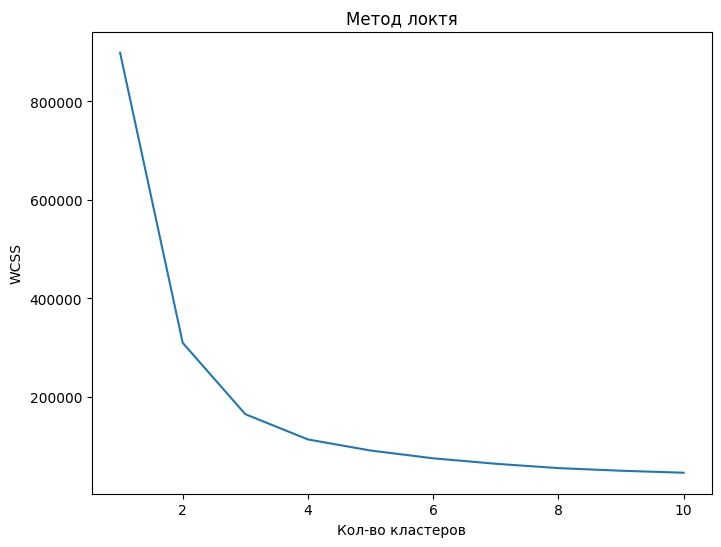

In [39]:
import matplotlib.pyplot as plt # импортируем библиотеку для графика.
from sklearn.cluster import KMeans # метод KMeans

X =dataCopy.values[:]
wcss = [] # wcss - within-cluster sum of squares, сумма квадратов внутрикластерных расстояний.
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(8, 6))
plt.plot(range(1,11), wcss)
plt.title('Метод локтя')
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')
plt.show()

In [40]:
clustersQuantity = 2 # исходя из графика получили, что количество кластеров - 2.
k_means =KMeans(init='k-means++', n_clusters=clustersQuantity, n_init=12)
k_means.fit(X)
labels = k_means.labels_
dataCopy['cluster'] = labels
print(dataCopy.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  alc_sug_ratio  cluster  
0      9.4       4.947368        0  
1      9.8  

[0.9978  0.9968  0.997   ... 0.99574 0.99547 0.99549] [4.94736842 3.76923077 4.26086957 ... 4.7826087  5.1        3.05555556]


Text(0, 0.5, 'pH')

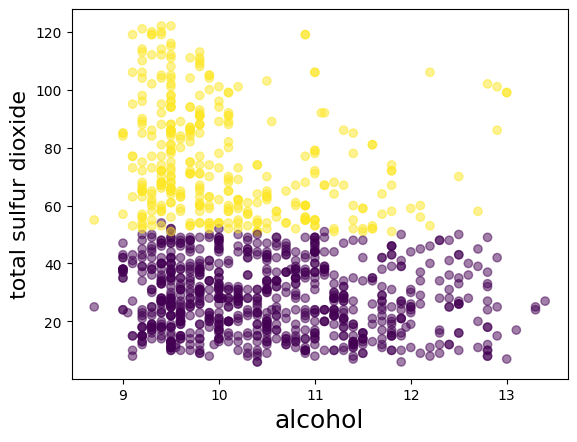

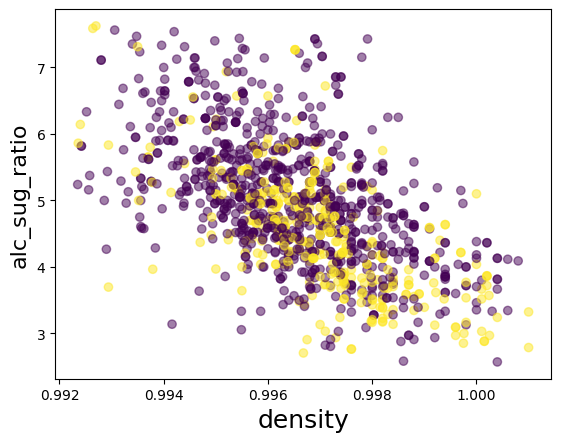

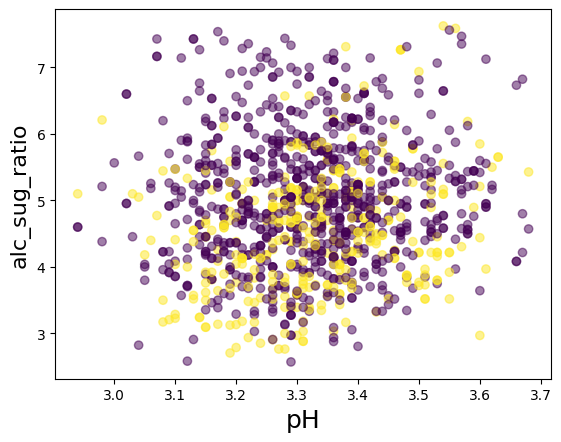

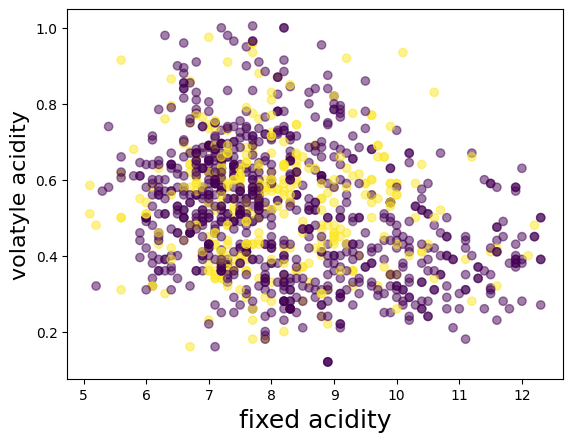

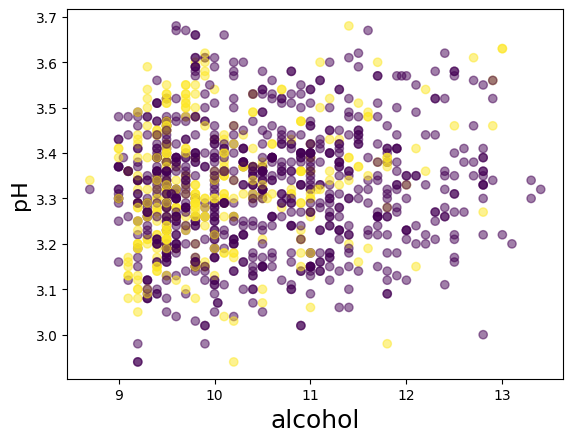

In [50]:
# Алкоголь и общий диоксид серы+
plt.figure()
plt.scatter(X[:, 10], X[:, 6], c=labels.astype(float), alpha=.5)
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)

# Плотность вина и содержание алкоголя на грамм сахара.
plt.figure()
plt.scatter(X[:, 7], X[:, 11], c=labels.astype(float), alpha=.5)
plt.xlabel('density', fontsize=18)
plt.ylabel('alc_sug_ratio', fontsize=16)

# Мера кислотности и содержание алкоголя на грамм сахара.
plt.figure()
plt.scatter(X[:, 8], X[:, 11], c=labels.astype(float), alpha=.5)
plt.xlabel('pH', fontsize=18)
plt.ylabel('alc_sug_ratio', fontsize=16)

# Постоянная кислотность и летучая кислотность
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels.astype(float), alpha=.5)
plt.xlabel('fixed acidity', fontsize=18)
plt.ylabel('volatyle acidity', fontsize=16)

# Алкоголь и мера кислотности
plt.figure()
plt.scatter(X[:, 10], X[:, 8], c=labels.astype(float), alpha=.5)
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('pH', fontsize=16)

<style>
    *{
        font-size: 14px;
    }

    h1{
        font-size: 24px;
        text-align: center;
        font-weight: bold;
    }

    h2{
        font-size: 16px;
        display: inline-block;
        
    }


    span{
        font-style: oblique;
    }
    
    a{
        text-decoration: underline;
    }
</style>

<p><h2>Вывод:</h2> построив несколько различных графиков, можно заметить, что два ярковыраженных кластера выстраивается лишь из-за зависимости алкоголя и общего диоксида серы. Таким образом, вина разделились на две группы: с большим содержанием диоксида серы и малым. Сравнение иных пар атрибутов не дало четкого разделения вина на кластеры. Однако на таких парах можно увидеть другие характеристики. Так, например, глядя на график зависимости плотности от содержания алкоголя на грамм сахара можно сделать вывод, что по мере увеличения плотности вина отношение алкоголя к сахару уменьшается. Хотя наблюдается значительный уровень перекрытия, можно сделать некоторые выводы по краям графика: для низкой плотности преобладают вина с высоким отношением алкоголя к сахару. Аналогично, вина с высокой плотностью имеют низкое соотношение алкоголя к сахару.</p>
